# OBI: Visualization
> Ignorance is strength

TODO: for random acquisition and p90 acquisition, plot both OBI and topk ensemble trajectories

for the paper it will be sufficient to plot 0 vs 5 OBI?

In [ ]:
# hide
import blackhc.project.script

Appended /home/blackhc/PycharmProjects/bald-ical/src to paths
Switched to directory /home/blackhc/PycharmProjects/bald-ical
%load_ext autoreload
%autoreload 2


In [ ]:
import collections
import functools
import math
import os
import re
from collections import namedtuple
from dataclasses import dataclass
from typing import NamedTuple

import laaos
import pandas as pd
import seaborn as sns
import torch
import wandb

In [ ]:
import operator
import functools

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")

In [ ]:
def savefig(g, path):
    g.savefig(path, transparent=True, dpi=300, bbox_inches="tight", pad_indices=0)

In [ ]:
c = sns.color_palette()
c

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Import WandB data

In [ ]:
api = wandb.Api()
#run = api.run("oatml-andreas-kirsch/balds/runs/tgikwfn1")
#run = api.run("oatml-andreas-kirsch/balds/runs/1zovclmd")
# OBI 90% run
#run = api.run("oatml-andreas-kirsch/balds/runs/1obq4ld2")
# random acquisition run
run = api.run("oatml-andreas-kirsch/balds/runs/3rbedktp")

In [ ]:
history = run.history()

In [ ]:
obi_performances = sum(history.obi_topk_ensemble_results, start=[])

In [ ]:
history.obi_topk_ensemble_results

0     [{'k': 10, 'online_training_set_size': 20, 'we...
1     [{'k': 10, 'kl_best_marginal': 0.3973498344421...
2     [{'accuracy': 0.6523000001907349, 'kl_best_mar...
3     [{'k': 10, 'kl_best_marginal': 0.5661911368370...
4     [{'Dataclass': 'batchbald_redux.online_bayesia...
5     [{'kl_best_marginal': 0.357333779335022, 'real...
6     [{'crossentropy': 1.1797287464141846, 'kl_best...
7     [{'Dataclass': 'batchbald_redux.online_bayesia...
8     [{'type': 'simple_topk_ensemble_by_accuracy', ...
9     [{'num_samples': 100, 'online_training_set_siz...
10    [{'crossentropy': 1.0621886253356934, 'k': 10,...
11    [{'accuracy': 0.8040000200271606, 'k': 10, 'on...
12    [{'accuracy': 0.8076000213623047, 'crossentrop...
13    [{'real_training_set_size': 85, 'total_trainin...
14    [{'type': 'simple_topk_ensemble_by_accuracy', ...
15    [{'num_samples': 100, 'real_training_set_size'...
16    [{'online_training_set_size': 100, 'total_trai...
Name: obi_topk_ensemble_results, dtype: object

In [ ]:
df = pd.DataFrame.from_records(obi_performances)
df

,k,online_training_set_size,weight_threshold,trial_index,Dataclass,accuracy,crossentropy,kl_best_marginal,num_samples,real_training_set_size,total_training_set_size,type
0,10,20,None,0,batchbald_redux.online_bayesian_inference.OBIP...,0.6146,2.095874,0.593416,100,20,40,simple_topk_ensemble_by_accuracy
1,10,20,None,0,batchbald_redux.online_bayesian_inference.OBIP...,0.5933,1.616477,0.353903,1000,20,40,simple_topk_ensemble_by_accuracy
2,10,20,None,0,batchbald_redux.online_bayesian_inference.OBIP...,0.5905,1.825253,0.350570,10000,20,40,simple_topk_ensemble_by_accuracy
3,10,21,None,0,batchbald_redux.online_bayesian_inference.OBIP...,0.5838,1.785451,0.448014,100,20,41,simple_topk_ensemble_by_accuracy
4,10,21,None,0,batchbald_redux.online_bayesian_inference.OBIP...,0.5969,1.825601,0.314262,1000,20,41,simple_topk_ensemble_by_accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,10,100,None,3,batchbald_redux.online_bayesian_inference.OBIP...,0.8618,0.508430,0.154498,1000,100,200,simple_topk_ensemble_by_accuracy
2576,10,100,None,3,batchbald_redux.online_bayesian_inference.OBIP...,0.8639,0.515467,0.208888,10000,100,200,simple_topk_ensemble_by_accuracy
2577,10,100,None,4,batchbald_redux.online_bayesian_inference.OBIP...,0.8785,0.503774,0.589471,100,100,200,simple_topk_ensemble_by_accuracy
2578,10,100,None,4,batchbald_redux.online_bayesian_inference.OBIP...,0.8589,0.547702,0.196092,1000,100,200,simple_topk_ensemble_by_accuracy


In [ ]:
df["obi_steps"] = df.online_training_set_size - df.real_training_set_size

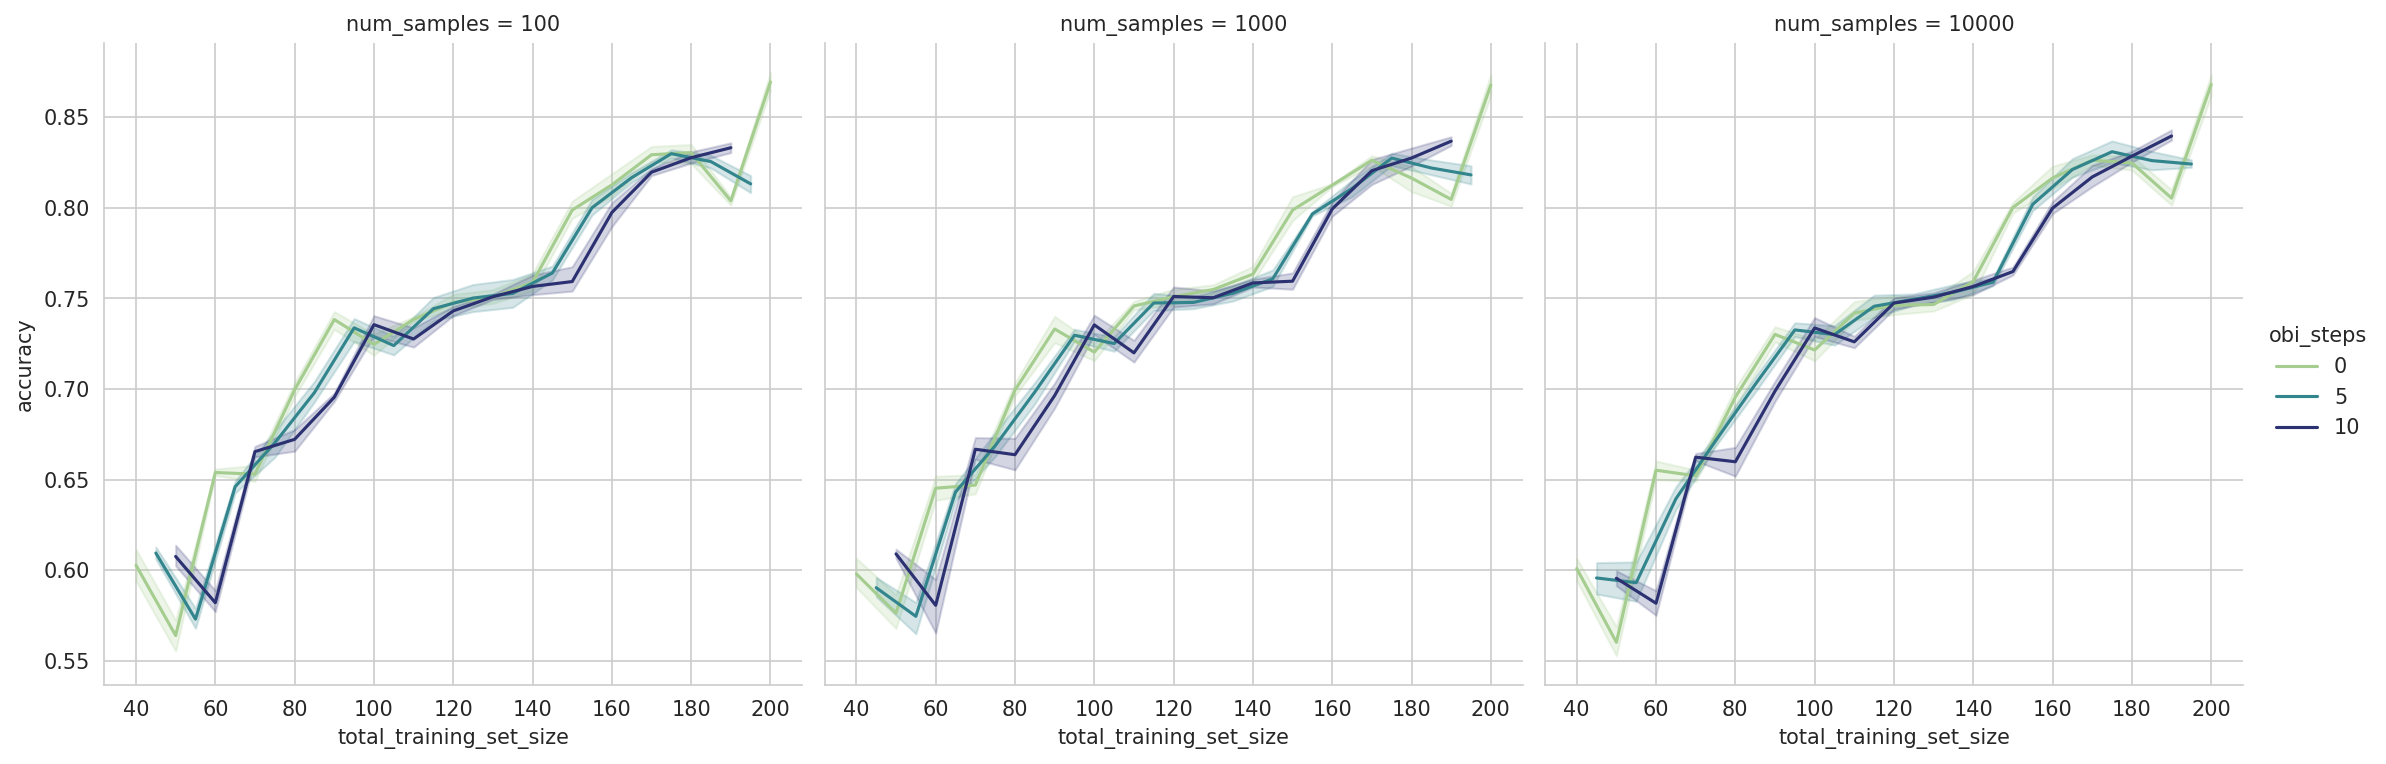

In [ ]:
sub_df = df[df.obi_steps % 5 == 0]
sns.relplot(data=sub_df, x="total_training_set_size", y="accuracy", col="num_samples", hue="obi_steps", palette=sns.color_palette("crest", as_cmap=True), kind="line")

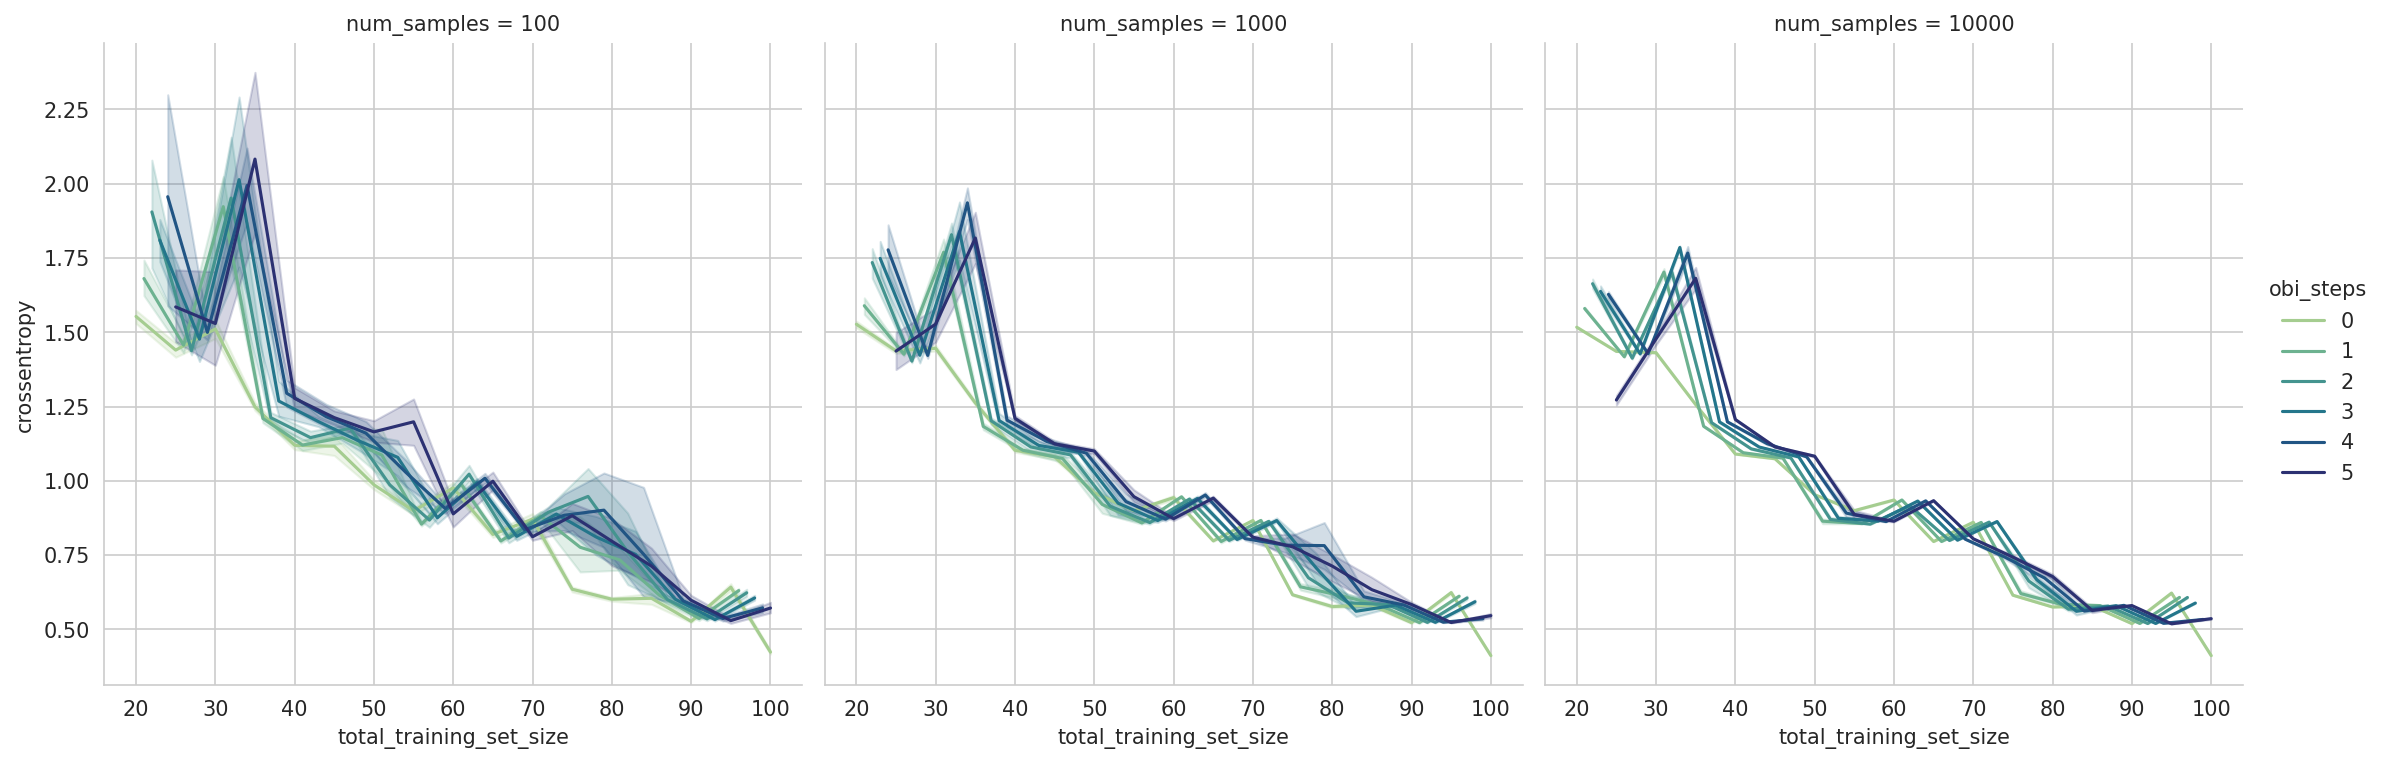

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="crossentropy", col="num_samples", hue="obi_steps", palette=sns.color_palette("crest", as_cmap=True), kind="line")

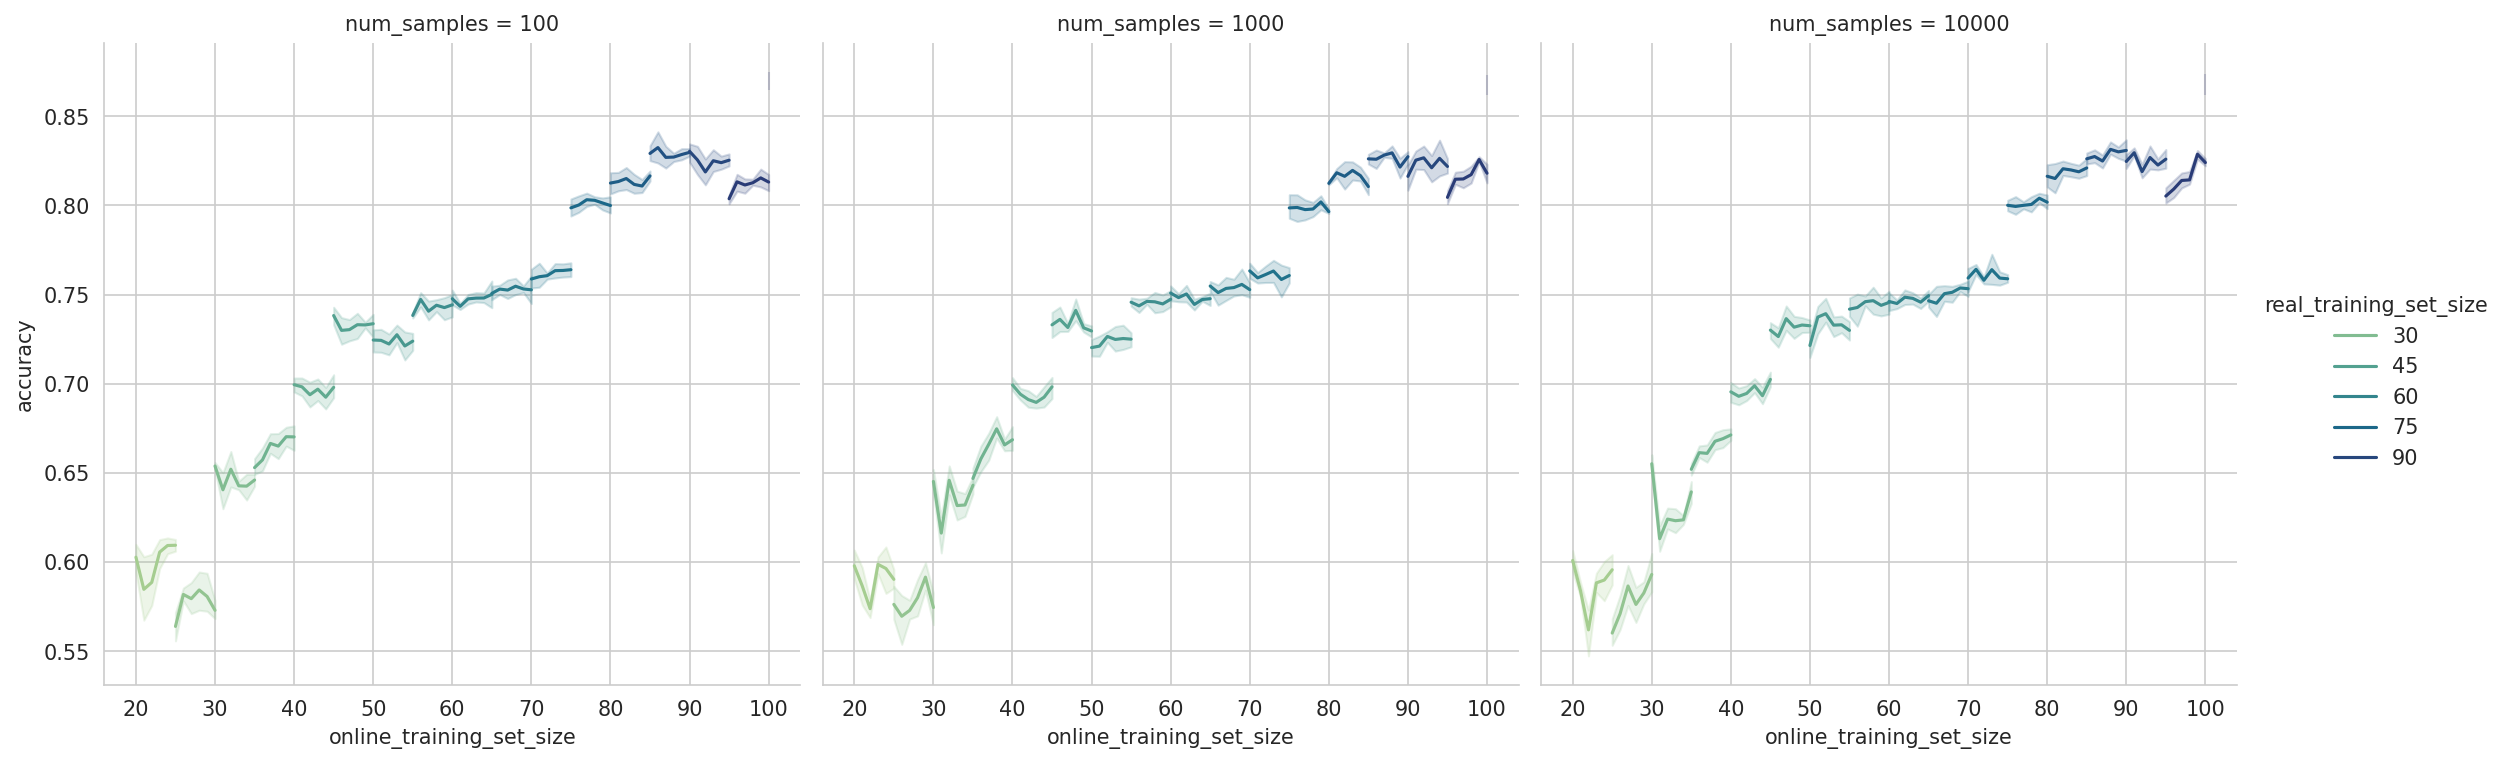

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="online_training_set_size", y="accuracy", col="num_samples", hue="real_training_set_size", palette=sns.color_palette("crest", as_cmap=True), kind="line")

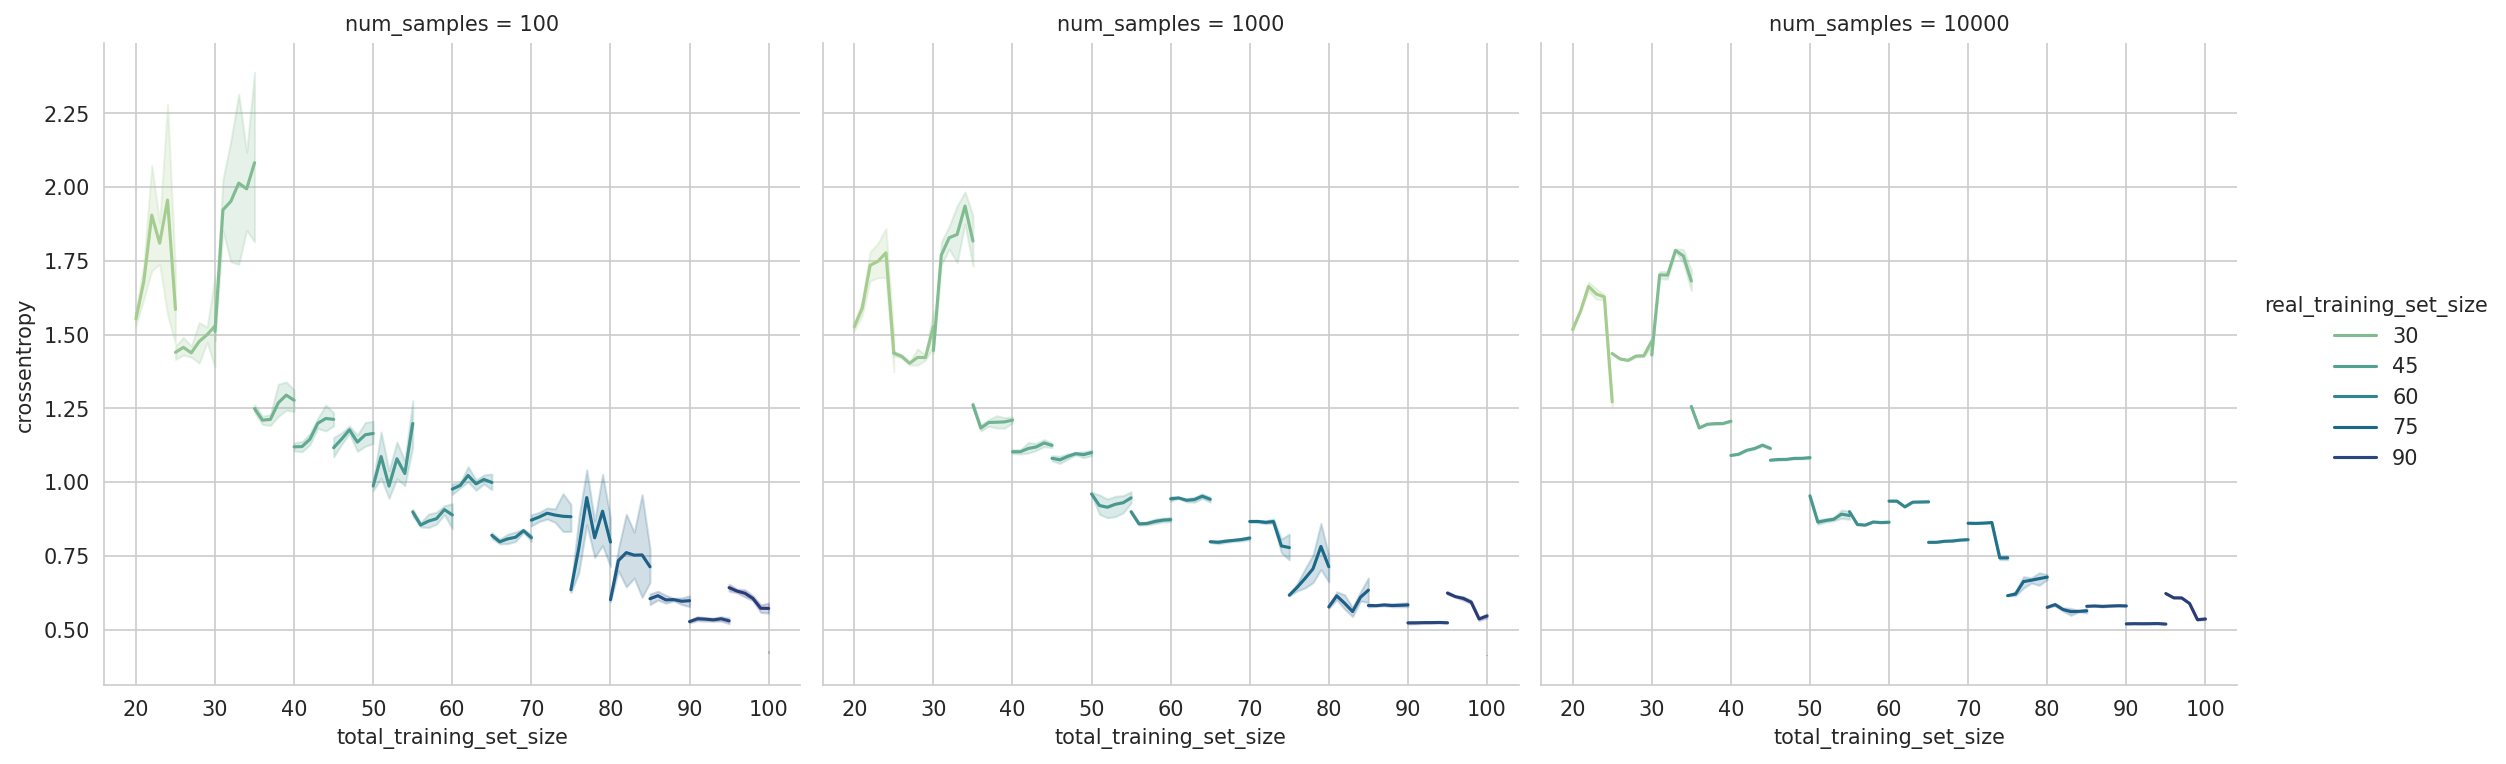

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="crossentropy", col="num_samples", hue="real_training_set_size", palette=sns.color_palette("crest", as_cmap=True), kind="line")

## 90% Run

In [ ]:
api = wandb.Api()
#run = api.run("oatml-andreas-kirsch/balds/runs/tgikwfn1")
#run = api.run("oatml-andreas-kirsch/balds/runs/1zovclmd")
# OBI 90% run
run = api.run("oatml-andreas-kirsch/balds/runs/1obq4ld2")

In [ ]:
history = run.history()

In [ ]:
obi_performances = sum(history.obi_performances, start=[])

In [ ]:
df = pd.DataFrame.from_records(obi_performances)
df

,accuracy,crossentropy,num_samples,online_training_set_size,real_training_set_size,total_training_set_size,trial_index,Dataclass
0,0.6219,1.490661,100,20,20,20,0,batchbald_redux.online_bayesian_inference.OBIP...
1,0.6218,1.477634,100,20,20,20,1,batchbald_redux.online_bayesian_inference.OBIP...
2,0.6198,1.507924,100,20,20,20,2,batchbald_redux.online_bayesian_inference.OBIP...
3,0.6234,1.518099,100,20,20,20,3,batchbald_redux.online_bayesian_inference.OBIP...
4,0.6181,1.513712,100,20,20,20,4,batchbald_redux.online_bayesian_inference.OBIP...
...,...,...,...,...,...,...,...,...
2575,0.9330,0.248106,10000,100,100,100,0,batchbald_redux.online_bayesian_inference.OBIP...
2576,0.9338,0.246163,10000,100,100,100,1,batchbald_redux.online_bayesian_inference.OBIP...
2577,0.9328,0.249166,10000,100,100,100,2,batchbald_redux.online_bayesian_inference.OBIP...
2578,0.9334,0.247442,10000,100,100,100,3,batchbald_redux.online_bayesian_inference.OBIP...


In [ ]:
df["obi_steps"] = df.online_training_set_size

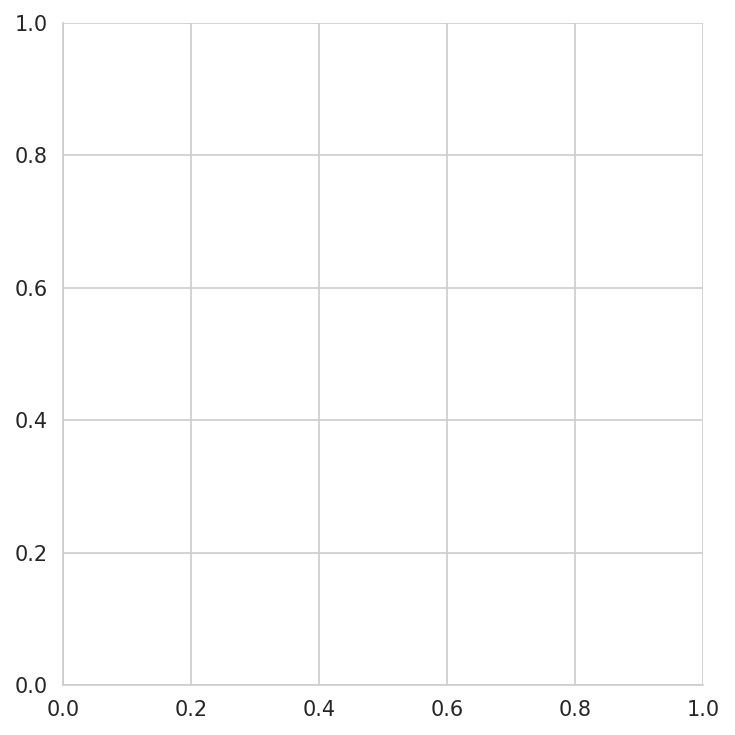

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="accuracy", col="num_samples", hue="obi_steps", palette=sns.color_palette("crest", as_cmap=True), kind="line")

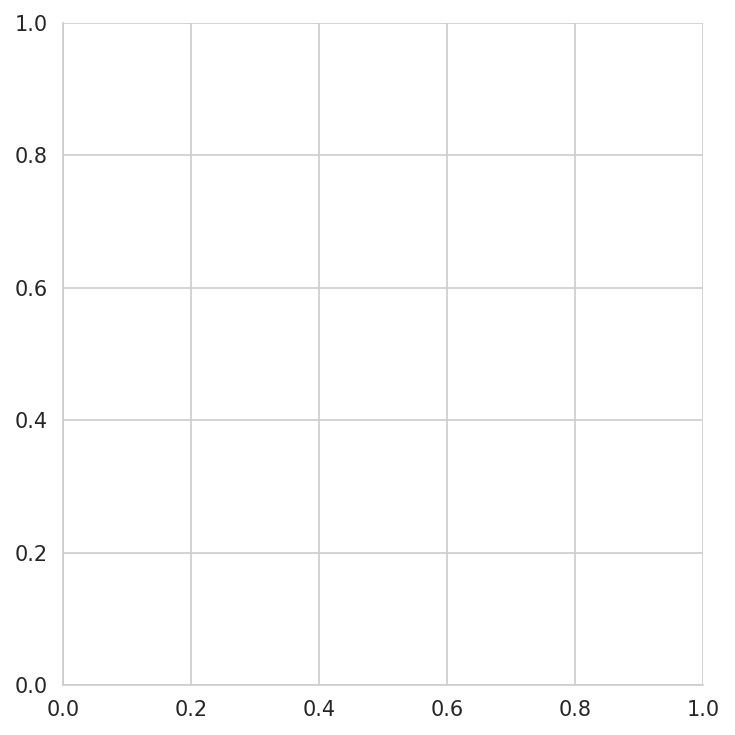

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="crossentropy", col="num_samples", hue="obi_steps", palette=sns.color_palette("crest", as_cmap=True), kind="line")

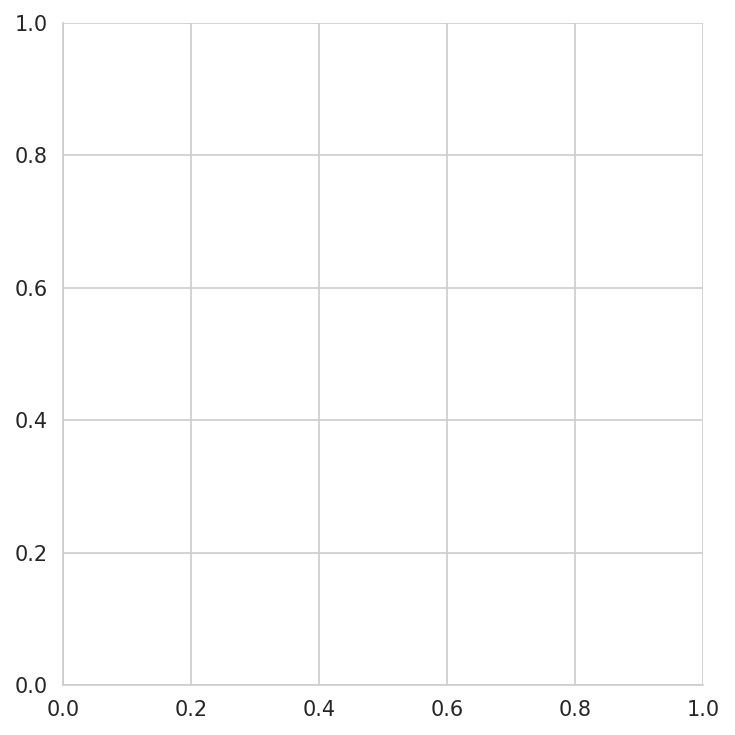

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="accuracy", col="num_samples", hue="real_training_set_size", palette=sns.color_palette("crest", as_cmap=True), kind="line")

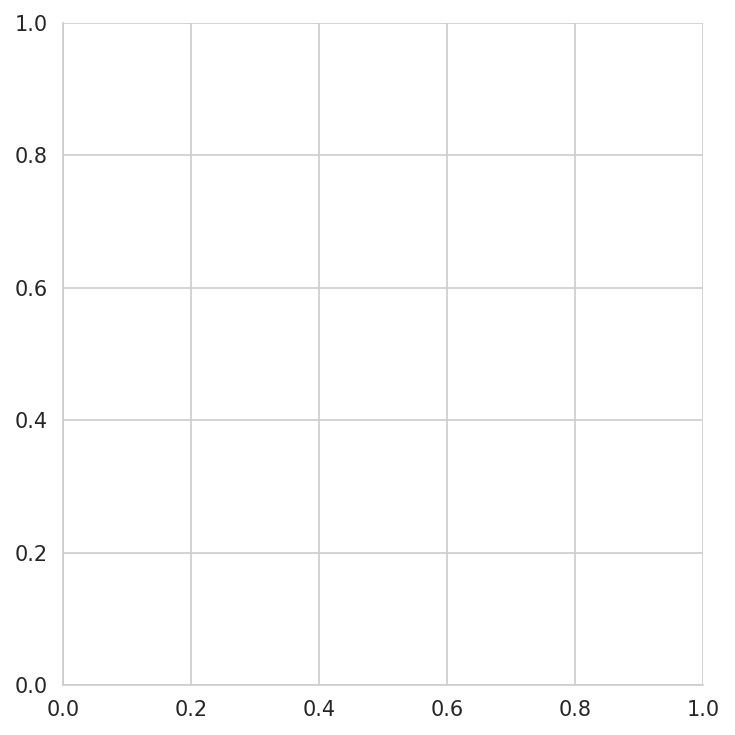

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="crossentropy", col="num_samples", hue="real_training_set_size", palette=sns.color_palette("crest", as_cmap=True), kind="line")